# Prepare de dataset

## Import libraries

In [27]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

import numpy as np
import pandas as pd
import io
import os
import simplejson
from PIL import Image
import glob 
# Imports the Google Cloud client library
from google.cloud import vision
from google.cloud.vision import types
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Convert images into vectors using bag of words techique

In [3]:


#This function will read the words present in an image and store the words in
# a list.def detect_document(path):

 #################  Detects document features in an image ################

def image_to_list(path):
    """Detects document features in an image."""
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = types.Image(content=content)

    response = client.document_text_detection(image=image)
    document = response.full_text_annotation

    word_list=[]
    for page in document.pages:
        for block in page.blocks:
            for paragraph in block.paragraphs:
                for word in paragraph.words:
                    mot=''
                    for symbol in word.symbols:
                        mot=mot+symbol.text
                    word_list.append(mot)

            
            
    return word_list

 ####### Function that transform a list of words into a vector of features ######
def list_to_array(X_list,liste_features):
    
    X_array=np.zeros((1,len(liste_features)))

    for i in range(len(liste_features)):
        #block_word=liste_features[i]
        #for j in range(len(block_word)):
        if ( liste_features[i] in X_list):
            X_array[0,i]=1
    
    return X_array

    

######### this function return a list of all the words in image_list ######
def transform_pictures_to_array(n):
    image_list = []
    compt=1
    for filename in glob.glob('mix_images/*.png'):

        image_list=image_list+image_to_list(filename)
        compt=compt+1
        if(compt%200==0):
            print(compt/1435*100, " %") 
    return image_list

################   this function takes out the numbers of a list and repetitions ##########
def RepresentsInt(s):
    try: 
        int(s)
        return True
    except ValueError:
        return False

def no_numbers(liste):
    new_liste=liste.copy()
    liste_int=[]
    for i in range(len(liste)):
        if(RepresentsInt(new_liste[i])==True):
            liste_int.append(new_liste[i])
    final_list= list(set(new_liste).difference(set(liste_int)))
    return final_list

def no_repetition(liste):
    return list(set(liste))


############# Construct the vectorize data set ##################
import re
def training_data(liste_features):
    l=len(liste_features)
    y_train=[]
    X_train=np.zeros((1,len(liste_features)))
    compt=1
    for filename in glob.glob('mix_images/*.png'):
        label=filename.rsplit('_', 1)[0]
        y_train.append(label.rsplit('/', 2)[1])
        #y_train.append(label)

        X_list=image_to_list(filename)
        X_array=list_to_array(X_list,liste_features)
        X_train=np.concatenate((X_train, X_array), axis=0)
        # savoir ou j'en suis
        compt=compt+1
        if(compt%200==0):
            print(compt/1435*100,'%')

    y_train=np.asarray (y_train)
    y_train.reshape(-1,1)

    return X_train[1:,:] , y_train



########## create label vector ####################################

def labels(n):
    # list with all the filename in images_test
    file_list = []
    y=[]
    for filename in glob.glob('mix_images/*.png'):
        file_list.append(filename)
     

    for fname in file_list:
        label =  fname.rsplit('_', 2)[0]
        label=label.rsplit('/', 2)[1]
        y.append(label)
    y=np.asarray (y)
    y.reshape(-1,1)
    return y




In [3]:
######################  Saving the data   ##########################################
print('-------- Create liste_features and save into text file ----------')    
liste_features=no_repetition(no_numbers(transform_pictures_to_array(3)))
print('size of liste_feature:',len(liste_features))
f = open('liste_feature.txt', 'w')
simplejson.dump(liste_features, f)
f.close()

print('-------- Create a training array ----------')
X_train, y_train=training_data(liste_features)
print(X_train.shape, y_train.shape)

print('-------- saving training into csv file ----------')
df_train= pd.DataFrame(data=X_train, index=None ,columns=liste_features)
df_label=pd.DataFrame(data=y_train, index=None, columns=['type_skill'])

df_train.to_csv('Exo_train_mix.csv')
df_label.to_csv('label_exo_train_mix.csv')


print(' Size of the dataset: ', X_train.shape,' elements')




-------- liste_features ----------
13.937282229965156  %
27.874564459930312  %
41.81184668989547  %
55.749128919860624  %
69.68641114982579  %
83.62369337979094  %
97.5609756097561  %
1548
-------- training array ----------
13.937282229965156 %
27.874564459930312 %
41.81184668989547 %
55.749128919860624 %
69.68641114982579 %
83.62369337979094 %
97.5609756097561 %
(1434, 1548) (1434,)
-------- saving training into csv file ----------


In [28]:
liste_features=["commemorative", "eleven", "divisble", "hour", "(", "free", "poet", "Do", "does", "flyers", "public", "giving", "Tucker", "need", "\u20ac8", "can", "grocery", "conference", "\u00b0", "tables", "Fairfax", "shipment", "advertisements", "La", "bike", "2x", "Divina", "given", "rained", "square", "homeschoolmath", "shuttle", "library", "network", "boxes", "J", "or", "page", "putting", "shipments", "Wayne", "collection", "Plastic", "combination", "best", "Under", "raisins", "V49", "a", ")", "Michigan", "6x6", "Campbell", "\u2192", "twenty", "slices", "chip", "B", "LOS", "could", "placed", "earn", "lunch", "Sasha", "his", "disturb", "Select", "NET", "numb", "I", "books", "carry", "E", "stepped", "Personnes", "goal", "Q2", "If", "bottom", "child", "place", "now", "25x", "baseballs", "oranges", "HHHHHHHHHHH", "noticed", "contains", "du", "ordered", "Jgroups", "Greenwood", "S", "own", "between", "closest", "divided", "x32", "nes", "photographers", "jewelry", "bandages", "back", "Exponent", "cubed", "setting", "charges", "shown", "partially", "prairie", "W", "colored", "Christina", "there", "represent", "lanthanum", "Colin", "Abby", "always", "cookie", "Check", "April", "budget", "Belle", "crates", "sale", "organizers", "Each", "ano", "been", "Menu", "promotion", "Re", "MA1", "Adams", "number", "subtracting", "company", "tenth", "magazine", "AA", "with", "equivalent", "sure", "beats", "Common", "scientists", "avocado", "trees", "iv", "Worksheet", "about", "using", "performed", "transportation", "pan", "buses", "States", "cookies", "necessary", "determine", "d", "tile", "strawberry", "grew", "tickets", "daffodils", "as", "three", "carpenter", "once", "Besides", "brought", "Victor", "garden", "MCCCXIII", "Evalua", "NO", "XXI", "days", "more", "closet", "VI", "favorite", "grade8", "Fen\u00eatre", "columns", "ticket", "Travis", "Amanda", "\u05da", "hundreds", "factors", "daisies", "No", "1b", ":", "XXII", "purchase", "thirty", "Belmont", "sheet", "radium", "Alexa", "created", "Bloomington", "x10", "total", "divide", "Spanish", "Eva", "her", "drives", "hat", "week", "looked", "was", "statement", "made", "friends", "hospital", "posts", "drive", "worksheets", "possible", "lowest", "ice", "product", "scrambled", "winter", "Connor", "sandwiches", "factorization", "q", "truck", "lacing", "dust", "binder", "seventy", "any", "numbers", "There", "Westford", "pound", "worksheet", "people", "receive", "When", "Is", "-", "gallium", "length", "22x", "living", "cans", "VX", "Explain", "camp", "brownie", "Note", "least", "fast", "thank", "hosting", "Carrie", "Quick", "It", "subway", "Wesley", "only", "V15", "science", "bulb", "LID", "underlined", "like", "A", "man", "Grade", "greater", "among", "Middletown", "birthday", "have", "png", "liter", "shelved", "DETERIO", "angry", "computer", "same", "triangle", "airplane", "quantities", "too", "Sandra", "colony", "local", "treating", "School", "Surprisingly", "Hundreds", "goldfish", "Algorithm", "then", "cream", "Go", "Mrs", "owes", "Compute", "organized", "color", "creates", "apply", "upcoming", "thirteen", "nationwide", "go", "corporation", "end", "hold", "Jaunts", "did", "squared", "marching", "Henry", "Rockport", "Solve", "expression", "snack", "Lakewood", "lilies", "until", "gym", "sixty", "thinking", "puts", "minimum", "strawberries", "posting", "easy", "algorithm", "b", "Aide", "perfect", "sprinkles", "receives", "photographer", "1x", "iii", "paint", "golf", "ship", "Karlene", "poems", "decides", "Use", "so", "Six", "Eli", "pdf", "13x", "sheets", "list", "at", "Before", "Cara", "later", "Modifier", "j", "Sadie", "Weston", "strikes", "replace", "zebra", "fried", "@", "well", "\u071d\u071d\u072c\u0710", "before", "pizzas", "Orchest", "has", "repres", "give", "/", "By", "owns", "D", "beautiful", "waterfall", "peanut", "Which", "necklaces", "Round", "3x4", "cucumber", "Answer", "radioactive", "different", "finds", "miles", "stored", "wants", "children", "struck", "from", "attendees", "passes", "Wellness", "covers", "crackers", "packs", "who", "ii", "estate", "game", "shows", "MIX", "integers", "reasoned", "orders", "hundredths", "sawed", "top", "characters", "Between", "Newton", "TV", "Where", "journals", "exactly", "current", "PO", "An", "hike", "supply", "school", "XVIII", "&", "2x2x2x2", "hornets", "appropriate", "blocks", "airport", "6th", "your", "Kevin", "Three", "deep", "flavors", "encourage", "centimeters", "share", "walk", "58x", "laps", "July", "z", "batches", "Divide", "restaurant", "Jarrod", "Zane", "should", "they", "check", "these", "Reco", "filling", "every", "coincidence", "common", "O", "Form", "Scientific", "just", "Roman", "adding", "following", "Reid", "butter", "and", "PDFs", "Japanese", "available", "will", "fish", "platters", "Mars", "court", "Fairview", "serving", "scientific", "Miss", "At", "rope", "flavor", "32x", "10\u00b0", "n", "ounce", "an", "want", "last", "decided", "Greatest", "exponents", "represents", "needed", "unit", "night", "diamond", "necklace", "IXL", "read", "many", "notebooks", "Standard", "Hammond", "card", "person", "printed", "file", "greeting", "arranges", "equally", "coupons", "start", "\u0e27", "contestant", "baseball", "the", "CXLVI", "5x5x5x5x5", "angelfish", "loaves", "<", "are", "per", "XXXIII", "coolers", "crawl", "Janet", "opera", "first", "difference", "conditions", "Brody", "III", "%", "together", "medium", "race", "plates", "addition", "visual", "work", "Key", "Load", "its", "tees", "literary", "meet", "Sports", "Tim", "choice", "Ellie", "nobody", "one", "Lake", "Blue", "96\u00a3", "Seaside", "form", "sum", "approximate", "other", "than", "paths", "earns", "battery", "puppy", "Gwen", "board", "mathx", "cm", "OG", "Y", "numerical", "when", "long", "Winchester", "cases", "cards", "classes", "what", "visit", "All", "Second", "route", "Tests", "The", "honey", "left", "Express", "stationery", "Utees", "HHHHHHHHH", "simplifying", "Crackers", "Estimate", "Lowell", "watering", "paper", "produced", "poets", "journal", "pet", "facility", "guess", "Georgetown", "They", "blueberry", "campers", "\u0728", "storage", "TVs", "issue", "Lanberry", "Change", "park", "question", "locations", "times", "daffodil", "Lancaster", "exponential", "S\u00e9curis\u00e9", "costs", "blank", "plans", "Earth", "Subtract", "stacks", "Patrick", "9x9x9x9x9", "Opieces", "CS", "negative", "eggs", "bread", "smallest", "sold", "but", "binders", "Ronald", "away", ">", "www", "\u00a3\u00a3", "tanks", "snowed", "lengths", "cymbals", "calculator", "Afficher", "ride", "MATHX", "p", "climbing", "Supplies", "igit", "\\", "Newberry", "set", "performing", "62x", "Jundershirts", "He", "tulip", "Spencer", "Math", "buy", "pencils", "preparing", "Kristen", "sample", "Multiply", "How", "fluorine", "row", "Audible", "all", "creation", "display", "Coffee", "rectangular", "word", "sleep", "juice", "middle", "V", "Euclid", "XXXVII", "DO", "Nine", "2x5", "X", "took", "undershirts", "convenient", "create", "years", "seafood", "greatest", "grades", "P", "community", "cars", "billion", "Wilson", "Father", "blue", "fence", "by", "two", "division", "Rewrite", "Millersburg", "batch", "print", "manufacturer", "gum", "mix", "pages", "Rita", "include", "basketballs", "March", "music", "oven", "lo", "orange", "order", "pattern", "products", "x34", "studying", "Gear", "eight", "needs", "candy", "ants", "rubber", "streetlights", ";", "finish", "rounded", "built", "Then", "prime", "pounds", "Circle", "worth", "Exponents", "large", "sitting", "wrote", "servings", "aquariums", "XXE", "'", "Factor", "day", "Ugroups", "Troy", "slice", "it", "kilometers", "over", "each", "Problem", "positive", "English", "store", "Annie", "Q", "coordinate", "Somerville", "writing", "fills", "individual", "ischool", "shipping", "bowls", "rain", "red", "divisible", "celery", "donate", "teachers", "section", "colors", "tank", "pepper", "Play", "inches", "decimal", "no", "cleaning", "digits", "money", "non", "use", "advantage", "electrician", "is", "Jkm", "completed", "games", "factor", "would", "close", "aquarium", "Ale", "packages", "ones", "furniture", "Complete", "snowflakes", "chocolate", "Evalu", "identical", "dish", "Using", "making", "Uservings", "sweeps", "category", "w", "i", "Meanwhile", "airplanes", "counting", "bacteria", "yellow", "bracelet", "stack", "c", "What", "plate", "straws", "\u04d8\u0440\u0456\u043b\u0430", "lab", "rows", "G", "band", "fees", "picture", "Silvergrove", "courts", "Jmi", "peanuts", "groups", "grade", "table", "ball", "yttrium", "poached", "collect", "Paint", "Perry", "grows", "snacks", "comes", "coeur", "tomato", "runs", "makes", "Haley", "f", "X8", "breakfast", "math", "Yes", "Owords", "chain", "ad", "6x6x6x6x6", "teacher", "[", "Dayton", "Determine", "students", "ate", "equal", "coupon", "g", "base", "3x3", "come", "Last", "Lamar", "Ones", "Springfield", "\u0715", "Favoris", "swarm", "find", "soda", "taking", "Hampton", "papers", "2\u00af2", "zb", "block", "Choose", "Halloween", "fiction", "registered", "son", "shop", "nearest", "plant", "biked", "Compare", "shelving", "C", "nine", "places", "David", "driver", "take", "Arcadia", "five", "Public", "earned", "throughout", "television", "Dover", "tape", "hundred", "represei", "currently", "bookcase", "time", "stores", "population", "run", "Uplates", "Emir", "session", "Pancho", "correct", "type", "Whole", "u", "One", "Stafford", "learn", "under", "categories", "On", "countries", "write", "boys", "km", "photographed", "seven", "Every", "Fill", "bedroom", "backpacks", "printers", "chart", "shops", "if", "fill", "After", "puzzles", "7x7x7x7", "sections", "XZ751", "competing", "bears", "aunts", "neither", "Notation", "whose", "she", "parte", "root", "Late", "V43", "size", "Darren", "them", "Manchester", "space", "Thousands", "Au", "farmer", "leaves", "written", "spend", "sentence", "used", "THHHHHHHHHHH", "Fichier", "Kingwood", "#", "OTens", "rounding", "scale", "numeral", "composite", "package", "both", "bulbs", "Ke", "whereas", "Exponential", 'tests', "Stop", "town", "in", "early", "questions", "hard", "employee", "standard", "containers", "airline", "^", "answered", "babysits", "buys", "Z", "ninety", "Imi", "party", "eighty", "supplies", "Converting", "Liam", "hours", "GCF", "able", "whole", "Why", "copies", "tiles", "In", "Evaluate", "takes", "sign", "sell", "correctly", "agent", "dinner", "evenly", "planet", "bus", "seats", "names", "yes", "Simplify", "bottles", "Kendra", "parking", "lake", "car", "Start", "Omi", "m", "he", "combined", "ruthenium", "out", "high", "Write", "watered", "round", "pizza", "Lawson", "answer", "weigh", "Five", "classmates", "envelopes", "Burlington", "snow", "folder", "ads", "pies", "new", "group", "Prunier", "poetry", "house", "insects", "Oliver", "Type", "Dustin", "meters", "grant", "?", "e", "going", "box", "trick", "]", "next", "video", "Buchanan", "club", "containing", "erasers", "While", "four", "\u201c", "Could", "latest", "crate", "approximately", "TH", "Elsa", "personal", "send", "year", "dealership", "whether", "food", "lists", "getting", "into", "cost", "plastic", "+", "remains", "carrot", "pieces", "student", "name", "get", "pie", "being", "IV", "raised", "Oxford", "Im", "U", "Greenville", "reasoning", "lots", "beginning", "Please", "emerald", "during", "competitor", "batteries", "exponent", "Put", "instructed", "split", "kind", "toys", "\u2013", ",", "fifty", "Farid", "having", "wasted", "bands", "class", "A1", "program", "example", "were", "Fitness", "cabins", "o", "second", "below", "Order", "bought", "true", "$", "summer", "6X", "Oak", "XXVIII", "cells", "XVII", "3x3x3x3", "Tuesday", "Basics", "recycling", "actual", "course", "factory", "after", "swabs", "She", "points", "particular", "Brad", "break", "mussels", "forma", "sent", "r", "List", "acres", "sticks", "produce", "*", "power", "CA", "real", "pairs", "expressions", "=", "cabin", "multiply", "rolls", "tei", "planted", "Q1", "know", "evaluate", "}", "\u00a9", "sets", "|", "pair", "abroad", "distance", "oo", "Jeu", "buying", "wishes", "sixteen", "riders", "To", "bake", "John", "Jcups", "O\u00b0", "Pencils", "sessions", "Expanded", "march", "garage", "formed", "Acce", "Middle", "half", "electrical", "off", "thousands", "weighed", "project", "babysitting", "Jinches", "words", "up", "Dana", "Add", "month", "doctors", "Anas", "tens", "na", "assigned", "doubles", "woven", "Cedarburg", "You", "12\u00d710", "sells", "net", "numbered", "Allenville", "doing", "notation", "repli", "explain", "computers", "solution", "business", "upset", "test", "s", "pack", "3042x1", "showed", "Paper", "bee", "offices", "beach", "Two", "Centerville", "definition", "Britney", "tournament", ".", "six", "reunion", "Anne", "4x4", "glass", "way", "Grove", "tall", "zeroth", "yesterday", "writes", "hiked", "big", "anthill", "estimate", "filled", "XIV", "roll", "Brandy", "weeks", "him", "million", "missing", "Time", "how", "ten", "houses", "boiled", "far", "Sixth", "sandwich", "XII", "again", "metal", "t", "EE", "VII", "spoons", "Both", "lids", "taller", "LE", "digit", "United", "service", "Delay", "tenths", "untouched", "of", "libraries", "had", "sons", "tulips", "portioned", "Michael", "seventeen", "x", "\u00b7", "logic", "chowder", "Mark", "Arrange", "Mary", "volleyball", "bracelets", "Rosa", "Brenna", "their", "10x", "\u041a\u0435", "much", "piece", "girls", "across", "XX", "expanded", "th", "city", "study", "gift", "estimated", "\u00d3", "\u2022", "Library", "So", "someone", "that", "caused", "sales", "not", "Igrams", "Now", "Sparrowtown", "less", "show", "university", "Another", "Jackson", "predators", "9X", "Angellist", "shortest", "selling", "newspaper", "ITI", "gives", "shelves", "WISE", "appetizers", "called", "Give", "bags", "nest", "Find", "complete", "Corporation", "fraction", "convert", "6M", "thousand", "for", "represented", "types", "N", "companies", "lin", "soil", "Negative", "T", "on", "Dave", "fit", "multiple", "sand", "storm", "make", "why", "sugar", "be", "may", "zl\u20ac", "For", "flowers", "{", "bookstore", "keeping", "y", "uncles", "Example", "emeralds", "hornet", "charging", "cooler", "flower", "Washington", "carries", "result", "life", "largest", "minutes", "case", "uses", "Draw", "brownies", "Tens", "cut", "put", "Stationery", "Monday", "coffee", "build", "ca", "mi", "ounces", "wood", "Summerfield", "morning", "trillion", "do", "Apparel", "creating", "Kensington", "4x4x4", "Submit", "folders", "\u30e3\u30fc", "another", "which", "while", "baking", "post", "clam", "pass", "Gina", "balls", "cheese", "https", "Sunday", "\u0e28", "plan", "value", "A9", "_", "pn", "cups", "grams", "First", "maximum", "cotton", "without", "this", "4x", "Saturday", "submarine", "Chrome", "cover", "5b", "forty", "!", "help", "recycle", "tadpoles", "Historique", "schools", "family", "future", "amount", "works", "trava", "8x", "must", "none", "to", "bases", "Monica", "some", "Practice", "pictures", "passengers", "you"]

# Preprocessing +visualization

## preprocessing

In [14]:
def label_number(liste_label, Y):
    Y_label=Y.copy()
    
    for i in range(len(Y)):
        Y_label[i,0]=liste_label.index(Y[i,0])
        
    return Y_label

# This function removes the useless features of liste_features
def reduction_list(liste_id_remove, liste_features):
    
    reduced_list=[i for j, i in enumerate(liste_features) if j not in liste_id_remove]
    return reduced_list

def feature_to_remove(coef):
    list_id=[]
    for i in range(coef.shape[1]):
        if (np.linalg.norm(coef[:,i])<1e-5):
            list_id.append(i)
    return list_id
    
    

In [15]:
#import the data
print("============= Import Data =================")
df_train=pd.read_csv('Exo_train_mix.csv')
df_train=df_train.drop(df_train.columns[0], axis=1)
df_label=pd.read_csv('label_exo_train_mix.csv')
df_label=df_label.drop(df_label.columns[0], axis=1)
print( " initial size liste_features :", len(liste_features))

print('============ GET RID OF WORDS THAT APPEAR LESS THAN 3 TIMES ============')
# get ride of words that appear less than 3 times
words=df_train.columns.values
drop=[]
drop_id=[]
for i in range(len(words)):
    if (sum(df_train[str(words[i])])<3):
        drop.append(words[i])
        liste_features.remove(words[i])
        drop_id.append(i)
    
print( " new size liste_features:", len(liste_features))

df_train=df_train.drop(drop, axis=1) 

X= df_train.as_matrix()
Y=df_label.as_matrix()
liste_label=  list(set(Y.reshape(1,len(Y))[0]))
Y_label=label_number(liste_label, Y)

# ################# Keep the best features #######################
print('========== KEEPING THE BEST FEATURES USING L1 NORM WITH LINEAR SVC ==========')

lsvc=LinearSVC(C=0.3, penalty="l1", dual=False).fit(X, Y.ravel())
model = SelectFromModel(lsvc, prefit=True)
print('Shape of X : ', X.shape)
X = model.transform(X)
print('Shape of X after feature reduction: ', X.shape)

liste_id_remove=feature_to_remove(lsvc.coef_)
features_removed=[]
for id in liste_id_remove:
    features_removed.append(liste_features[id])
print('\n========== REMOVED FEATURES ============== \n\n\ ',features_removed)

liste_features=reduction_list(liste_id_remove, liste_features)

#########################
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

print('\n========== FINAL SIZE OF X ===============')
print('size of X_train:', X_train.shape)
print('size of X_test:', X_test.shape)      
print('\n The list of labels is:\n',liste_label,'\n')


============= Import Data =================
 initial size liste_features : 1548
============ GET RID OF WORDS THAT APPEAR LESS THAN 3 TIMES ============
 new size liste_features: 481
========== KEEPING THE BEST FEATURES USING L1 NORM WITH LINEAR SVC ==========
Shape of X :  (1434, 481)
Shape of X after feature reduction:  (1434, 253)

========== REMOVED FEATURES ============== 

\  ['need', 'can', 'shipment', 'given', 'rained', 'boxes', 'shipments', 'Wayne', 'combination', 'could', 'lunch', 'his', 'I', 'now', 'HHHHHHHHHHH', 'Jgroups', 'between', 'charges', 'cookie', 'subtracting', 'sure', 'cookies', 'No', 'purchase', 'thirty', 'her', 'week', 'made', 'friends', 'q', 'any', 'people', 'When', 'length', 'fast', 'science', 'like', 'Middletown', 'have', 'colony', 'local', 'color', 'corporation', 'end', 'hold', 'gym', 'puts', 'b', 'ship', 'decides', 'so', 'at', '@', 'before', 'give', 'different', 'miles', 'passes', 'Wellness', 'packs', 'who', 'ii', 'game', 'PO', 'An', 'school', 'blocks', 'res

## visualize the Data

-------PCA-------------


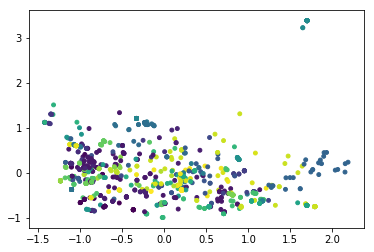

In [16]:
### we are going to dimish the dimension of the data by using PCA:
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
print("-------PCA-------------")

pca = PCA(n_components=2)
#pca.fit(X_train)
X_reduced=pca.fit_transform(X_train)

Y_train_label=label_number(liste_label, Y_train)
plt.scatter(X_reduced[:,0],X_reduced[:,1], c=Y_train_label, s=15)
plt.show()

# Supervised Learning

## Training

In [37]:
def knn_plot(liste_k, X_train, Y_train, X_test, Y_test):
    accuracy=[]
    for k in liste_k:
        neigh = KNeighborsClassifier(n_neighbors=k)
        neigh.fit(X_train, Y_train)
        Y_predict=np.asarray(neigh.predict(X_test)).reshape(-1,1)
        accuracy.append(accuracy_score(Y_predict,Y_test))
    plt.plot(liste_k, accuracy, label=' Accuracy function of k')
    plt.xlabel('number of neighbors k')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

--------- SVM Classifier --------------

best parameters: {'C': 150, 'kernel': 'rbf'}
0.878048780488
------------ KNN classifier --------

best parameters: {'n_neighbors': 1}
0.843205574913


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


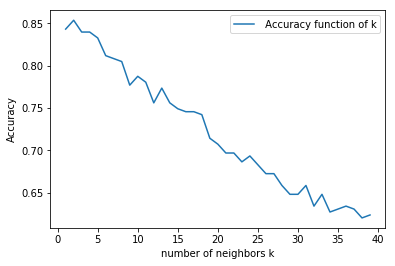

------------ Logistic Classification --------

best parameters: {'C': 10}
0.891986062718


In [38]:
#SVM classifier : grid_search
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

print('--------- SVM Classifier --------------\n')
parameters = {'kernel':('linear', 'rbf'), 'C':[  1,  10, 50, 100,150, 300]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
y_train=Y_train.reshape(1,len(Y_train))[0]
clf.fit(X_train, y_train)

Y_predict=np.asarray(clf.predict(X_test)).reshape(-1,1)

#print(np.concatenate((Y_predict,Y_test),axis=1))
print('best parameters:',clf.best_params_)
print(accuracy_score(Y_predict,Y_test))

print('------------ KNN classifier --------\n')
neigh = KNeighborsClassifier()
parameters = {'n_neighbors':[k for k in range(1,20)]}
neigh2 = GridSearchCV(neigh, parameters)
neigh2.fit(X_train, y_train)
Y_predict=np.asarray(neigh2.predict(X_test)).reshape(-1,1)
print('best parameters:',neigh2.best_params_)
print(accuracy_score(Y_predict,Y_test))
liste_k=[k for k in range(1,40)]
knn_plot(liste_k, X_train, Y_train, X_test, Y_test)

print('------------ Logistic Classification --------\n')
log =LogisticRegression()
parameters = {'C':[10**k for k in range(-3,4)]}
log = GridSearchCV(log, parameters)
log.fit(X_train, y_train)

Y_predict=np.asarray(log.predict(X_test)).reshape(-1,1)
print('best parameters:',log.best_params_)
print(accuracy_score(Y_predict,Y_test))

# print('------------ Neural Network Classification --------\n')
# net =MLPClassifier()
# parameters = {'hidden_layer_sizes':[(100,1),(100,2), (100,3), (50,1), (50,2), (20,1), (20,2)],'max_iter':[3000]}
# net = GridSearchCV(net, parameters)
# net.fit(X_train, y_train)

# Y_predict=np.asarray(net.predict(X_test)).reshape(-1,1)
# print(accuracy_score(Y_predict,Y_test))





## Predict an exercise's class and give one similar

In this section we are going to give an exercise from our dataset and try to predict it. We will then take a random 6th grade exercise from the internet et see if our algorithm is capable of giving a similar exercise from our dataset

In [18]:
#this function gives an exercises with a specific skill 
import random
def give_exercise_skill(skill):
    list_exo=[]
    for filename in glob.glob('mix_images/*.png'):
        label=filename.rsplit('_', 1)[0]
        label=label.rsplit('/', 2)[1]
        if (label==skill):
            list_exo.append(filename)
            
    img=mpimg.imread(random.choice(list_exo))
    imgplot = plt.imshow(img)
    plt.show()       
              

=============  INITIAL IMAGE =============


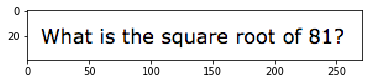

============ PROPOSED EXERCISE ============
Skill= ['D10']


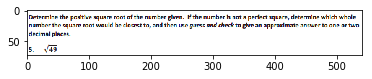

In [25]:
######################### TEST ##################################
print('=============  INITIAL IMAGE =============')
filename='mix_images/D10_21.png'
img=mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

print('============ PROPOSED EXERCISE ============')
#convert the image into an array using bag of words
X_exp=list_to_array(image_to_list(filename), liste_features)
# we predict it
y_predict=np.asarray(log.predict(X_exp)).reshape(-1,1)

print('Skill=',y_predict[0])
# we give an exercicese from the same skill
give_exercise_skill(y_predict[0][0])


# Unsupervised learning

The aim of this section is to be able to make a cluster of all the exercices. In fact, the final aim would be to propose exercises similar to an input exercise. We are now using a dataset with more data than previously but unlabeled. 

## Training

In [42]:
############################ Useful functions ################################################
from PIL import Image
import glob


def give_images(n1,n2,n3):
    compt=0
    for filename in glob.glob('mix_images/*.png'):
        
        if (compt==n1 or compt==n2 or compt==n3):
            print(filename)
            img=mpimg.imread(filename)
            imgplot = plt.imshow(img)
            plt.show()
            #jpgfile = Image.open(filename)
            #jpgfile.show()
            
        compt=compt+1   

#get the closest center from a element
def closest_center(X_exp,centers):
    num_label=0
    
    center_coord=centers[0].copy()
    center_coord=center_coord.reshape(1,len( center_coord))
    dist_min=np.linalg.norm(X_exp.T-center_coord.T)
    
    for i in range(len(centers)):
        center_coord=centers[i].copy()
        center_coord=center_coord.reshape(1,len( center_coord))
        dist=np.linalg.norm(X_exp.T-center_coord.T)
        if(dist_min>dist):
            dist_min=dist
            num_label=i
    print('label number:', num_label)
    return num_label

#get the id elements that are in a certain class
def ClusterIndicesNumpy(clustNum, labels_array): #numpy 
    return np.where(labels_array == clustNum)[0]


#this function return an array with the centers, and list where list[i]=array[id of elements in class i]
def k_mean_map(nb_clusters, X):
    list_id_in_label=[]
    kmeans2 = KMeans(n_clusters=nb_cluster)
    kmeans2.fit(X)
    centers=kmeans2.cluster_centers_
    labels=kmeans2.labels_# label of all the element
    
    for i in range(nb_clusters):
        list_id_in_label.append(ClusterIndicesNumpy(i, labels))
    return centers , list_id_in_label

# gives 3 very similar exercises
def similar_exercise(filename, liste_features, centers,list_id_in_label):
    
    X_exp=list_to_array(image_to_list(filename), liste_features)
    label_id=closest_center(X_exp,centers)
    similar_exo=list_id_in_label[label_id].tolist()
    give_images(similar_exo[0],similar_exo[1],similar_exo[2])
    
def kmean_plot(liste_n, X):
    loss=[]
    for n in liste_n:
        centers , list_id_in_label= k_mean_map(nb_cluster, X)
        somme=0
        for k in range(n):
            for id in list_id_in_label[n]:
                somme=somme+(X[id,:]-centers[n,:])**2
        loss.append(somme)
        
    plt.plot(liste_k, loss, label=' Loss function of nb_cluster')
    plt.xlabel('nb_clusters')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
#########################################################################################################        

In [ ]:
############## k-mean clustering (best parameter research)#####################
print('--------- best parameter research (k mean clustering)--------------------')
from sklearn.cluster import KMeans
import numpy as np

parameters = {'n_clusters':[k for k in range(100,120)]}
kmeans = KMeans()
kmeans = GridSearchCV(kmeans, parameters)
kmeans.fit(X)
# we get the best number of clusters
nb_cluster=kmeans.best_params_['n_clusters']
print(kmeans.best_params_)

liste_n=[n for n in range(100, 120)]
kmean_plot(liste_n, X)
#nb_cluster=111
########################## k mean clustering ##################
print('--------- k mean clustering  --------------------')
kmeans2 = KMeans(n_clusters=nb_cluster)
kmeans2.fit(X)

labels=kmeans2.labels_# label of all the element
centers=kmeans2.cluster_centers_




--------- best parameter research (k mean clustering)--------------------


In [41]:
########################## test #############################
centers , list_id_in_label= k_mean_map(nb_cluster, X)
print(centers.shape, X[1,:].shape)

(118, 253) (253,)


## Give a similar type of exercise 

================ INITIAL EXERCISE ================


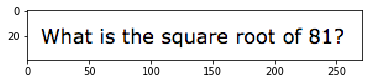

================ PROPOSED EXERCISES ================
label number: 32
mix_images/A1_7.png


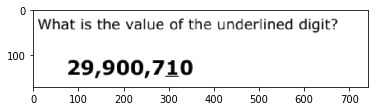

mix_images/D10_12.png


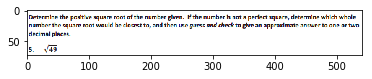

mix_images/D10_16.png


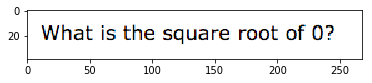

In [26]:
################## Test ################
print('================ INITIAL EXERCISE ================')
filename='mix_images/D10_21.png' 
img=mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()
print('================ PROPOSED EXERCISES ================')
similar_exercise(filename, liste_features, centers,list_id_in_label)



$Remark:$
We can observe that one out of the 3 proposed exercises has nothing to do with the input exercise. This problem can be tackled with more data ! If we had a lot of labeled data, we could first train a supervised learning algorithm to predict the exercise's skill, and then train an unsupervised algorithm within  the targeted skill in order to propose a similar type of exercise